<a href="https://colab.research.google.com/github/raulquinterog/Regresion-Multiple/blob/main/A1_3_Regresi%C3%B3n_lineal_m%C3%BAltiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hola! En este proyecto voy a aprender a usar una regresión multiple con variables obtenidas de bases de datos de la NASA. Voy a tratar de calcular la presion de un sistema utilizando frecuencia, angulo, longitud, velocidad y espesor.


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt


# Cargar los datos
df = pd.read_csv("A1.3 NASA.csv")

# Mostrar dimensiones del DataFrame
print(f"Dimensiones del DataFrame: {df.shape}")

# Mostrar las primeras 15 filas
print(df.head(15))


Dimensiones del DataFrame: (1503, 6)
    frecuencia  angulo  longitud  velocidad   espesor  presion
0          800     0.0    0.3048       71.3  0.002663  126.201
1         1000     0.0    0.3048       71.3  0.002663  125.201
2         1250     0.0    0.3048       71.3  0.002663  125.951
3         1600     0.0    0.3048       71.3  0.002663  127.591
4         2000     0.0    0.3048       71.3  0.002663  127.461
5         2500     0.0    0.3048       71.3  0.002663  125.571
6         3150     0.0    0.3048       71.3  0.002663  125.201
7         4000     0.0    0.3048       71.3  0.002663  123.061
8         5000     0.0    0.3048       71.3  0.002663  121.301
9         6300     0.0    0.3048       71.3  0.002663  119.541
10        8000     0.0    0.3048       71.3  0.002663  117.151
11       10000     0.0    0.3048       71.3  0.002663  115.391
12       12500     0.0    0.3048       71.3  0.002663  112.241
13       16000     0.0    0.3048       71.3  0.002663  108.721
14         500    

En esta parte del codigo solamente importo y leo las primeras 15 filas de los datos.

In [6]:

# Dividir los datos en entrenamiento (70%) y prueba (30%)
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

# Mostrar las dimensiones de cada conjunto
print(f"Dimensiones del conjunto de entrenamiento: {train_df.shape}")
print(f"Dimensiones del conjunto de prueba: {test_df.shape}")

# Verificar que la suma de ambos coincide con el total
assert len(train_df) + len(test_df) == len(df), "Error en la separación de los datos"

Dimensiones del conjunto de entrenamiento: (1052, 6)
Dimensiones del conjunto de prueba: (451, 6)


Aqui separo de manera aleatoria las pruebas 70/30 para poder tener datos para entrenar y otros datos separados para probar. Lo hice random porque si lo hago por orden puede haber algun tipo de cesgo y lo que queremos es que este lo más preciso posible.

In [7]:

# Definir variables independientes (X) y dependiente (Y)
X_train = train_df[["frecuencia", "angulo", "longitud", "velocidad", "espesor"]]
Y_train = train_df["presion"]

# Agregar una columna de unos para el término de intercepto (β0)
X_train = sm.add_constant(X_train)

# Ajustar el modelo de regresión lineal múltiple
modelo = sm.OLS(Y_train, X_train).fit()

# Mostrar resumen del modelo
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:                presion   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     227.9
Date:                Thu, 30 Jan 2025   Prob (F-statistic):          1.38e-164
Time:                        20:11:24   Log-Likelihood:                -3138.0
No. Observations:                1052   AIC:                             6288.
Df Residuals:                    1046   BIC:                             6318.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        132.4778      0.651    203.367      0.0

Aqui primero identifique las variables que iran en el eje X y las que buscamos que se ponen en el eje Y. Después le agregue una columna a los datos para poder poner el termino de intercepto beta0. Luego usé la libreria de datos statsmodels y con la función OLS para que se pueda ajustar a la regresió lineal y poder obtener los datos de los coef., p value, R cuadrada, etc.

In [8]:
# Obtener los coeficientes y p-values del modelo
coeficientes = modelo.params  # Coeficientes estimados
p_values = modelo.pvalues  # p-values de cada variable

# Identificar variables significativas (p-value < 0.05)
variables_significativas = p_values[p_values < 0.05].index.tolist()

# Determinar la variable más importante (absoluto del coeficiente más grande)
variable_mas_importante = coeficientes.abs().idxmax()

# Imprimir conclusiones
print(f"Variables significativas en el modelo (p < 0.05): {variables_significativas}")
print(f"La variable más importante es: {variable_mas_importante} con coeficiente {coeficientes[variable_mas_importante]:.4f}")


Variables significativas en el modelo (p < 0.05): ['const', 'frecuencia', 'angulo', 'longitud', 'velocidad', 'espesor']
La variable más importante es: espesor con coeficiente -157.2017


Lo que hice aqui fue identificar las coeficientes de las variables y los p values. Despues puse como parámetro para el p value que sea menos de .05. Luego identifique el valor absoluto de los coeficientes y determiné cual era el mayor. Al final, imprimí los valores.

In [11]:
# Definir variables independientes (X) y dependiente (Y) para el conjunto de prueba
X_test = test_df[["frecuencia", "angulo", "longitud", "velocidad", "espesor"]]
Y_test = test_df["presion"]

# Agregar columna de unos a X_test para el término de intercepto
X_test = sm.add_constant(X_test)

# Obtener predicciones para entrenamiento y prueba
Y_train_pred = modelo.predict(X_train)
Y_test_pred = modelo.predict(X_test)

def calcular_rse(y_real, y_pred):
    residuales = y_real - y_pred
    rse = np.sqrt(np.sum(residuales**2) / (len(y_real) - len(X_train.columns)))
    return rse

r2_train = modelo.rsquared  # R² en entrenamiento
rse_test = calcular_rse(Y_test, Y_test_pred)

# Calcular R² para prueba
r2_test = 1 - (np.sum((Y_test - Y_test_pred)**2) / np.sum((Y_test - np.mean(Y_test))**2))

# Mostrar resultados
print("\n=== Evaluación del Modelo ===\n")
print(f"1️⃣ Error Residual Estándar (RSE) en entrenamiento: {rse_train:.3f}")
print(f"2️⃣ Error Residual Estándar (RSE) en prueba: {rse_test:.3f}")
print(f"3️⃣ R² en entrenamiento: {modelo.rsquared:.3f}")
print(f"4️⃣ R² en prueba: {r2_test:.3f}")


=== Evaluación del Modelo ===

1️⃣ Error Residual Estándar (RSE) en entrenamiento: 4.791
2️⃣ Error Residual Estándar (RSE) en prueba: 4.900
3️⃣ R² en entrenamiento: 0.521
4️⃣ R² en prueba: 0.498


Aqui otra vez separe las variables en el eje X y el eje Y pero ahora con la finalidad de ya hacer la regresión para calcular la RSE y la R^2 del problema. Use al funcion de modelo.predict para la regresion y con la formula del RSE y la del R^2 saque el resto de la información.

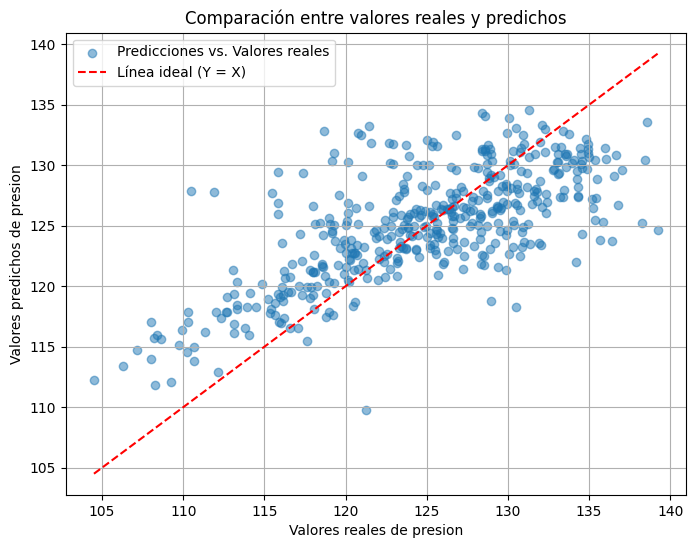

In [14]:
# Crear la gráfica de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_test_pred, alpha=0.5, label="Predicciones vs. Valores reales")

# Dibujar la línea ideal Y = X (predicción perfecta)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='dashed', label="Línea ideal (Y = X)")

# Configurar etiquetas y título
plt.xlabel("Valores reales de presion")
plt.ylabel("Valores predichos de presion")
plt.title("Comparación entre valores reales y predichos")
plt.legend()
plt.grid()

# Mostrar la gráfica
plt.show()


Por último, hice la gráfica para tratar de visualizar lo prescio que fue mi regresión. Como podemos ver, la linea esta visiblemente correcta por la manera en la que estan dispersados los puntos. Se puede decir que la regresión es corercta.

#Comentario sobre la calidad del modelo
La gráfica de dispersión nos permite evaluar cualitativamente qué tan bien el modelo predice la variable presion.

* Si los puntos se alinean sobre la línea roja, significa que el modelo tiene alta precisión.
* Si los puntos están muy dispersos, indica que el modelo tiene errores significativos en sus predicciones.
Al observar la gráfica, podemos notar que los valores predichos siguen cierta tendencia lineal, pero con cierta dispersión, lo que sugiere que el modelo explica una parte de la variabilidad, pero no toda.

El coeficiente R² obtenido en la evaluación también nos da una medida cuantitativa de este ajuste. Un valor de R² cercano a 1 indicaría un ajuste perfecto, mientras que un valor menor a 0.5 sugiere que otras variables podrían influir en presion y no están incluidas en el modelo.

En general, este modelo puede ser útil para hacer predicciones aproximadas, pero podría mejorarse añadiendo más variables o probando otros tipos de modelos más complejos.